In [2]:
from itertools import zip_longest

import numpy as np
import matplotlib.pyplot as plt
from GCR import GCRQuery
from astropy.table import Table
from GCR import GCRQuery
import GCRCatalogs                                                                                               
from astropy.table import Table
import healpy as hp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Start modifications here

Test opening halo table

In [3]:
cat_halos = Table.read('/sps/lsst/users/tguillem/stage_franck_lesplingart/test_cosmoDC2/10450/halos.fits')
#cat_halos.pprint_all()
#halo_mass
# ra et dec, redshift

cat_galaxies = Table.read('/sps/lsst/users/tguillem/stage_franck_lesplingart/test_cosmoDC2/10450/galaxies.fits')
#cat_galaxies.pprint_all()
#mag_g z id r, redshift, mag_i, dec, redshift_smeared, halo_id,mag_y, halo_mass, ra mstar_i mstar_
#len(cat_halos)

len(cat_halos)



61725

In [4]:
len(cat_galaxies)

1293471

plt.hist(SNdata['phase'],bins=70, range=[-3,3])halo_mass en 1D

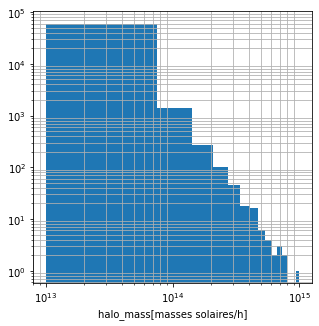

In [5]:
fig = plt.figure(figsize  = (5, 5))
plt.hist(cat_halos['halo_mass'], range = (pow(10,13),pow(10,15)), bins=15)
plt.xlabel("halo_mass[masses solaires/h]")
plt.grid(which='minor')
plt.xscale('log')
plt.yscale('log')
plt.show()

Plusieurs cartes en 2D de la surface du ciel

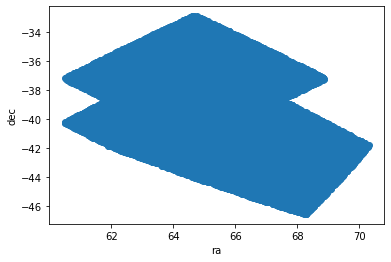

In [6]:
plt.scatter(cat_halos['ra'],cat_halos['dec'])
plt.xlabel("ra")
plt.ylabel("dec")
plt.show()

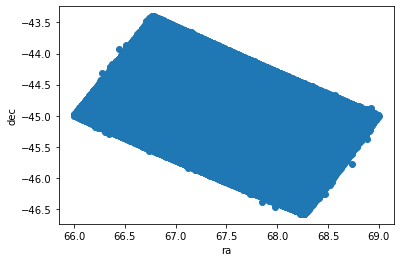

In [48]:
plt.scatter(cat_galaxies['ra'],cat_galaxies['dec'])
plt.xlabel("ra")
plt.ylabel("dec")
plt.show()

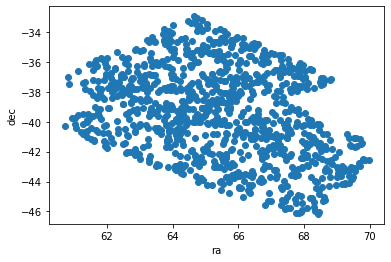

In [7]:
high = (cat_halos['halo_mass']>pow(10,14))
hcat_halos = cat_halos[high]
plt.scatter(hcat_halos['ra'],hcat_halos['dec'])
plt.xlabel("ra")
plt.ylabel("dec")
plt.show()

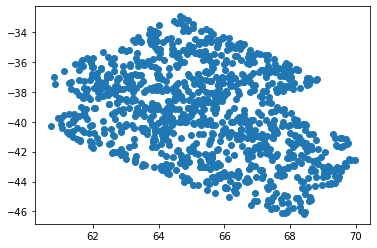

In [8]:
filter_arr = []

for element in cat_halos: 
    if (element['halo_mass']>pow(10,14)):
          filter_arr.append(True)

    else:
          filter_arr.append(False) 

cat_halos_high =cat_halos[filter_arr]
plt.scatter(cat_halos_high['ra'],cat_halos_high['dec'])

In [9]:
norm_high = hcat_halos['halo_mass']/np.linalg.norm(hcat_halos['halo_mass'])
#norm_high

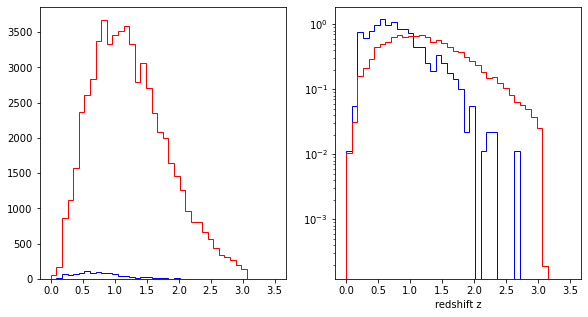

In [10]:
low = (cat_halos['halo_mass']<pow(10,14))
#normhcat = (hcat_halos['halo_mass'] - min(hcat_halos['halo_mass']))/(max(hcat_halos['halo_mass'])- min(hcat_halos['halo_mass']))                                 
lcat_halos = cat_halos[low]
norm_low = lcat_halos['halo_mass']/np.linalg.norm(lcat_halos['halo_mass'])
fig = plt.figure(figsize=[15,5])
plt.subplot(131)
plt.hist(hcat_halos['redshift'], density=False, range = (0, 3.5), bins = 40, histtype='step', color = 'blue',label='masse des halos  superieur à 10^14');
plt.hist(lcat_halos['redshift'], density=False, range = (0, 3.5), bins = 40, histtype='step', color = 'red',label='masse des halos inferieur à 10^14');
plt.subplot(132)
plt.hist(hcat_halos['redshift'], density=True, range = (0, 3.5), bins = 40, histtype='step', color = 'blue',label='masse des halos  superieur à 10^14');
plt.hist(lcat_halos['redshift'], density=True, range = (0, 3.5), bins = 40, histtype='step', color = 'red',label='masse des halos inferieur à 10^14');

#plt.legend()
plt.yscale('log')
plt.xlabel("redshift z")
plt.show()

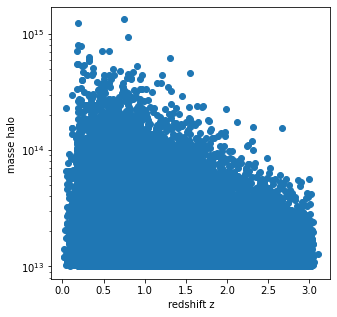

In [11]:
fig = plt.figure(figsize=[5,5])
plt.scatter(cat_halos['redshift'],cat_halos['halo_mass'])
plt.xlabel("redshift z")
plt.ylabel("masse halo ")
plt.yscale('log')
plt.show()

Test galaxie

Densite par rapport a la magnitude

In [87]:

fig = plt.figure(figsize  = (5, 5))
plt.hist(cat_galaxies['mag_i'],  density=False,   bins=np.arange(min(cat_galaxies['mag_i']), max(cat_galaxies['mag_i']), step=0.05),histtype='step')
plt.xlabel("mag_i")
plt.grid(which='minor')
plt.yscale('log')
plt.show()

SyntaxError: invalid syntax (1399132144.py, line 2)

Magnitude dans les differentes bandes

In [15]:
filter_array_z3=[] 
for element in cat_galaxies:
        if (element['redshift']>=1.3 and element['redshift']<=1.6):
            
            filter_array_z3.append(True)
        else:
            filter_array_z3.append(False)
cat_galaxies_z3 = cat_galaxies[filter_array_z3]
len(cat_galaxies_z3)

237377

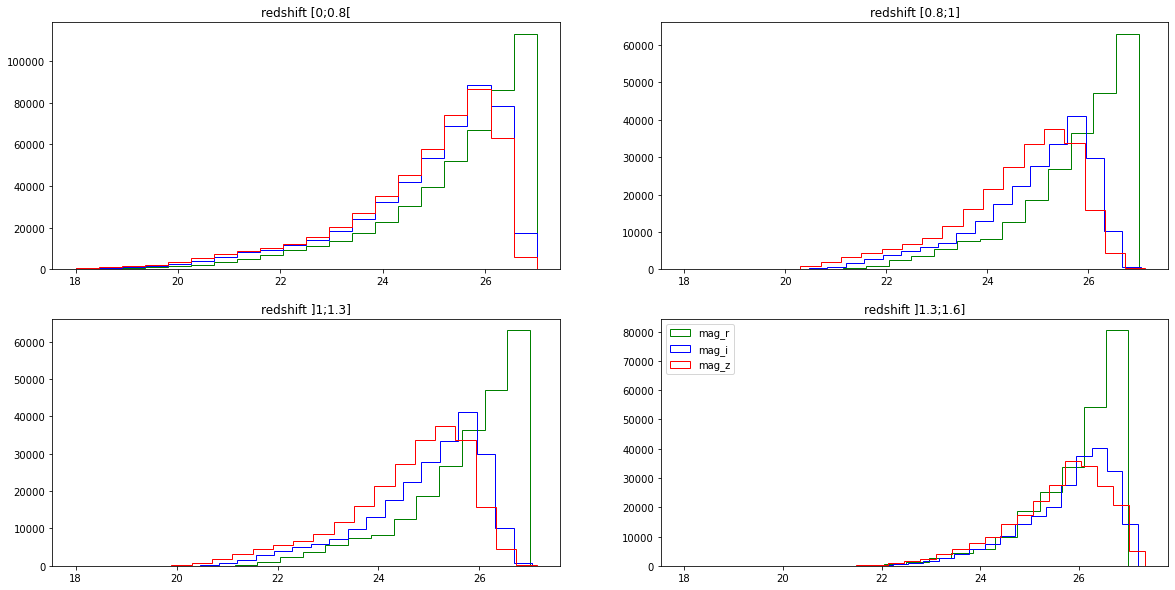

In [28]:
filter_array_z2=[] 
for element in cat_galaxies:
        if (element['redshift']>=0.8 and element['redshift']<=1):
            
            filter_array_z2.append(True)
        else:
            filter_array_z2.append(False)
cat_galaxies_z2 = cat_galaxies[filter_array_z2]

filter_array_z1=[] 
for element in cat_galaxies:
        if (element['redshift']<0.8):         
            filter_array_z1.append(True)
        else:
            filter_array_z1.append(False)
cat_galaxies_z1 = cat_galaxies[filter_array_z1]

filter_array_z3=[] 
for element in cat_galaxies:
        if (element['redshift']>1 and element['redshift']<=1.3):         
            filter_array_z3.append(True)
        else:
            filter_array_z3.append(False)
cat_galaxies_z3 = cat_galaxies[filter_array_z2]

filter_array_z4=[] 
for element in cat_galaxies:
        if (element['redshift']>1.3):         
            filter_array_z4.append(True)
        else:
            filter_array_z4.append(False)
cat_galaxies_z4 = cat_galaxies[filter_array_z4]

fig = plt.figure(figsize=[20,10])
plt.subplot(221)
plt.hist(cat_galaxies_z1['mag_r'], density=False, bins = 20,range=(18,27), histtype='step', color = 'green',label='mag_r');
plt.hist(cat_galaxies_z1['mag_i'], density=False, bins = 20,range=(18,27), histtype='step', color = 'blue',label='mag_i');
plt.hist(cat_galaxies_z1['mag_z'], density=False, bins = 20,range=(18,27), histtype='step', color = 'red',label='mag_z');
plt.title('redshift [0;0.8[')
plt.subplot(222)
plt.hist(cat_galaxies_z2['mag_r'], density=False, bins = 20,range=(18,27), histtype='step', color = 'green',label='mag_r');
plt.hist(cat_galaxies_z2['mag_i'], density=False, bins = 20, histtype='step', color = 'blue',label='mag_i');
plt.hist(cat_galaxies_z2['mag_z'], density=False, bins = 20, histtype='step', color = 'red',label='mag_z');
plt.title('redshift [0.8;1]')
plt.subplot(223)
plt.hist(cat_galaxies_z3['mag_r'], density=False, bins = 20,range=(18,27), histtype='step', color = 'green',label='mag_r');
plt.hist(cat_galaxies_z3['mag_i'], density=False, bins = 20, histtype='step', color = 'blue',label='mag_i');
plt.hist(cat_galaxies_z3['mag_z'], density=False, bins = 20, histtype='step', color = 'red',label='mag_z');
plt.title('redshift ]1;1.3]')
plt.subplot(224)
plt.hist(cat_galaxies_z4['mag_r'], density=False, bins = 20,range=(18,27), histtype='step', color = 'green',label='mag_r');
plt.hist(cat_galaxies_z4['mag_i'], density=False, bins = 20, histtype='step', color = 'blue',label='mag_i');
plt.hist(cat_galaxies_z4['mag_z'], density=False, bins = 20, histtype='step', color = 'red',label='mag_z');
plt.title('redshift ]1.3;1.6]')
plt.legend(loc="upper left")


In [38]:
print('ok')

ok


0


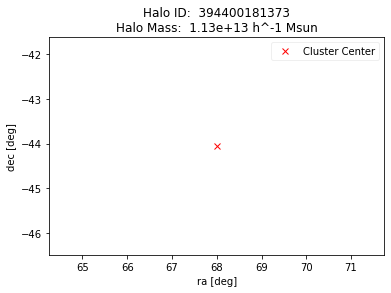

0


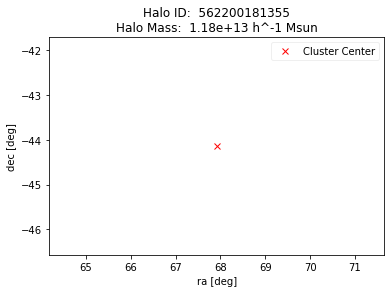

0


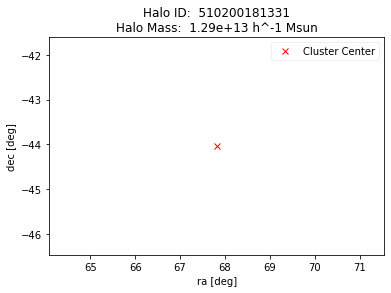

In [111]:
i=0
for cluster in cat_halos:
    
    #if (cluster['ra']>66.5 and cluster['ra']<68.5 and cluster['dec']> (-46) and cluster['dec']< (-44)):
    if(cluster['ra']<67 or cluster['ra']>68):
        continue
    if (cluster['dec']<-45 or cluster['dec']>-44):
        continue    
    
    i=i+1
    if(i==4):
        break
        
    my_halos_id = cluster['halo_id']
    for element in cat_galaxies:
        if(element['halo_id']==my_halos_id):
            print('SUCCESS')
    my_members = cat_galaxies[cat_galaxies['halo_id']==my_halos_id]
    print(len(my_members))
   # members = GCRQuery('halo_id == {}'.format(cluster['halo_id'])).filter(galaxy_data)
    plt.figure()
    #plt.scatter(
        #members['ra'], 
        #members['dec'], 
        #s=(19-members['mag_r'])*8, 
        #label='Galaxy Members [{}]'.format(len(members['ra']))
    #)
    plt.plot(cluster['ra'], cluster['dec'], 'xr', label='Cluster Center')
    plt.legend(loc='best', framealpha=0.3)
    plt.xlabel(r'ra [deg]')
    plt.ylabel(r'dec [deg]')
    plt.title('Halo ID:  {}\nHalo Mass:  {:.2e} h^-1 Msun'.format(cluster['halo_id'], cluster['halo_mass']))
    plt.show()
    

        